# 1. Data

## 1.1. Read Data

In [1]:
# Import the libraries 
import time
import random
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import FuncAnimation, PillowWriter 
from collections import defaultdict
from queue import PriorityQueue

In [2]:
# Read data Distance 
df = pd.read_csv("Distance.csv")
df.head()

,Province,Ho Chi Minh,Ha Noi,Hai Phong,Can Tho,Dong Nai,Quang Nam,Bac Ninh,Hai Duong,Nghe An,...,Ha Nam,Hung Yen,Kien Giang,Lai Chau,Da Nang,Dak Nong,Dien Bien,Vinh Phuc,Latitude,Longitude
0,Ho Chi Minh,0.000000,1160.328125,1116.327582,124.340009,30.558650,597.455091,1160.851404,1132.378709,885.694721,...,1094.960639,1124.167884,253.245571,1338.581425,612.139008,197.376884,1284.528508,1184.499927,10.7638,106.6436
1,Ha Noi,1160.328125,0.000000,126.385860,1235.554616,1144.991818,656.690777,59.499238,88.532125,274.868404,...,75.458333,61.937428,1253.715745,264.688208,632.876926,1012.092866,258.969150,25.156596,21.1382,105.5050
2,Hai Phong,1116.327582,126.385860,0.000000,1201.305114,1098.305041,575.045991,74.855725,38.212372,257.613414,...,81.046226,67.797153,1233.502621,388.365117,552.142680,954.684700,385.354979,131.855404,20.8000,106.6667
3,Can Tho,124.340009,1235.554616,1201.305114,0.000000,154.836491,706.318330,1240.919573,1214.553251,961.075782,...,1173.594679,1203.685561,141.402052,1397.101956,719.138646,318.316161,1340.060030,1260.217144,10.0333,105.7833
4,Dong Nai,30.558650,1144.991818,1098.305041,154.836491,0.000000,572.923473,1144.164266,1115.131849,870.755857,...,1078.756363,1107.678552,282.901262,1327.577244,588.201480,169.248401,1274.383073,1168.998580,10.9277,106.8681


In [3]:
# Create data for Visualize
lat, long = {}, {}
for i in range(len(df)):
    lat[df.iloc[i][0].strip()] = df.iloc[i][64]
    long[df.iloc[i][0].strip()] = df.iloc[i][65]
    
longitude, latitude, province = [], [], []
for i in range(len(df)):
    longitude.append(df.iloc[i][65])
    latitude.append(df.iloc[i][64])
    province.append(df.iloc[i][0])

C:\Users\tranv\AppData\Local\Temp\ipykernel_35764\625732830.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lat[df.iloc[i][0].strip()] = df.iloc[i][64]
C:\Users\tranv\AppData\Local\Temp\ipykernel_35764\625732830.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  long[df.iloc[i][0].strip()] = df.iloc[i][65]
C:\Users\tranv\AppData\Local\Temp\ipykernel_35764\625732830.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  longitude.a

## 1.2. Random Main Warehouse

In [4]:
# Store name of each province (delete strip space)
Province_space = df['Province']  # maybe have space L/R
Province = []
for i in Province_space:
    Province.append(i.strip())

# Random mainwarehouse: mw_north, mw_central, mw_south
# Create list store province bound -> random
list_mw_north, list_mw_central, list_mw_south = [], [], []
for i in range(df.shape[0]):
    if df.iloc[i,64] > 19:
        list_mw_north.append(Province[i])
    elif df.iloc[i,64] < 12:
        list_mw_south.append(Province[i])
    else: 
        list_mw_central.append(Province[i])

# Random
random.seed(42)
mw_north, mw_central, mw_south = random.choice(list_mw_north), random.choice(list_mw_central), random.choice(list_mw_south)
print(mw_north,mw_central,mw_south, sep = "\n")

print(list_mw_north, list_mw_central, list_mw_south, sep = "\n")

Son La
Nghe An
Ho Chi Minh
['Ha Noi', 'Hai Phong', 'Bac Ninh', 'Hai Duong', 'Thanh Hoa', 'Nam Dinh', 'Thai Nguyen', 'Phu Tho', 'Thai Binh', 'Quang Ninh', 'Lang Son', 'Ninh Binh', 'Hoa Binh', 'Yen Bai', 'Lao Cai', 'Bac Giang', 'Cao Bang', 'Ha Giang', 'Tuyen Quang', 'Bac Kan', 'Son La', 'Ha Nam', 'Hung Yen', 'Lai Chau', 'Dien Bien', 'Vinh Phuc']
['Quang Nam', 'Nghe An', 'Hue', 'Dak Lak', 'Binh Dinh', 'Quang Ngai', 'Phu Yen', 'Ha Tinh', 'Quang Binh', 'Gia Lai', 'Kon Tum', 'Quang Tri', 'Da Nang', 'Dak Nong']
['Ho Chi Minh', 'Can Tho', 'Dong Nai', 'Khanh Hoa', 'Vung Tau', 'Ca Mau', 'Soc Trang', 'An Giang', 'Lam Dong', 'Binh Duong', 'Bac Lieu', 'Dong Thap', 'Binh Thuan', 'Ninh Thuan', 'Long An', 'Tra Vinh', 'Tay Ninh', 'Tien Giang', 'Vinh Long', 'Hau Giang', 'Ben Tre', 'Binh Phuoc', 'Kien Giang']


## 1.3. Convert Distance -> Distance Truck -> Distance Plane (Main Warehouse)

In [5]:
# Convert distance -> cost
# Cost truck = (Distance / 60) * 35
def distance_to_truck_cost(dis_truck):
    return (dis_truck * 35) / 60 
# apply to convert distance to cost truck 
df.iloc[:, 1:64] = df.iloc[:, 1:64].apply(distance_to_truck_cost)

In [6]:
# Check data after convert distance to cost
df.head()

,Province,Ho Chi Minh,Ha Noi,Hai Phong,Can Tho,Dong Nai,Quang Nam,Bac Ninh,Hai Duong,Nghe An,...,Ha Nam,Hung Yen,Kien Giang,Lai Chau,Da Nang,Dak Nong,Dien Bien,Vinh Phuc,Latitude,Longitude
0,Ho Chi Minh,0.000000,676.858073,651.191089,72.531672,17.825879,348.515470,677.163319,660.554247,516.655254,...,638.727039,655.764599,147.726583,780.839165,357.081088,115.136516,749.308296,690.958291,10.7638,106.6436
1,Ha Noi,676.858073,0.000000,73.725085,720.740193,667.911894,383.069620,34.707889,51.643740,160.339903,...,44.017361,36.130166,731.334185,154.401455,369.178207,590.387505,151.065337,14.674681,21.1382,105.5050
2,Hai Phong,651.191089,73.725085,0.000000,700.761317,640.677941,335.443495,43.665840,22.290550,150.274492,...,47.276965,39.548339,719.543196,226.546318,322.083230,556.899408,224.790404,76.915652,20.8000,106.6667
3,Can Tho,72.531672,720.740193,700.761317,0.000000,90.321287,412.019026,723.869751,708.489396,560.627540,...,684.596896,702.149911,82.484531,814.976141,419.497543,185.684427,781.701684,735.126667,10.0333,105.7833
4,Dong Nai,17.825879,667.911894,640.677941,90.321287,0.000000,334.205359,667.429155,650.493579,507.940916,...,629.274545,646.145822,165.025736,774.420059,343.117530,98.728234,743.390126,681.915838,10.9277,106.8681


In [7]:
# DO NOT USE TWICE
# Find id mw
(id_north, id_central, id_south) = (0,0,0)

for index in range(len(Province)):
    if Province[index] == mw_north:
        id_north += index 
    elif Province[index] == mw_central:
        id_central += index 
    elif Province[index] == mw_south:
        id_south += index 

# Cost plane = (Distance / 800 + time_warehouse) * 160 = (12 * Distance_Truck) / 35 + time_warehouse * 160
time_warehouse = 2  # 2h Main Warehouse
# North
df.iloc[id_north, id_central+1] = (df.iloc[id_north, id_central+1] * 12) / 35 + time_warehouse * 160
df.iloc[id_north, id_south+1] = (df.iloc[id_north, id_south+1] * 12) / 35 + time_warehouse * 160
# Central
df.iloc[id_central, id_north+1] = (df.iloc[id_central, id_north+1] * 12) / 35 + time_warehouse * 160
df.iloc[id_central, id_south+1] = (df.iloc[id_central, id_south+1] * 12) / 35 + time_warehouse * 160
# South
df.iloc[id_south, id_north+1] = (df.iloc[id_south, id_north+1] * 12) / 35 + time_warehouse * 160
df.iloc[id_south, id_central+1] = (df.iloc[id_south, id_central+1] * 12) / 35 + time_warehouse * 160

# Check convert data to cost
df.head()

,Province,Ho Chi Minh,Ha Noi,Hai Phong,Can Tho,Dong Nai,Quang Nam,Bac Ninh,Hai Duong,Nghe An,...,Ha Nam,Hung Yen,Kien Giang,Lai Chau,Da Nang,Dak Nong,Dien Bien,Vinh Phuc,Latitude,Longitude
0,Ho Chi Minh,0.000000,676.858073,651.191089,72.531672,17.825879,348.515470,677.163319,660.554247,497.138944,...,638.727039,655.764599,147.726583,780.839165,357.081088,115.136516,749.308296,690.958291,10.7638,106.6436
1,Ha Noi,676.858073,0.000000,73.725085,720.740193,667.911894,383.069620,34.707889,51.643740,160.339903,...,44.017361,36.130166,731.334185,154.401455,369.178207,590.387505,151.065337,14.674681,21.1382,105.5050
2,Hai Phong,651.191089,73.725085,0.000000,700.761317,640.677941,335.443495,43.665840,22.290550,150.274492,...,47.276965,39.548339,719.543196,226.546318,322.083230,556.899408,224.790404,76.915652,20.8000,106.6667
3,Can Tho,72.531672,720.740193,700.761317,0.000000,90.321287,412.019026,723.869751,708.489396,560.627540,...,684.596896,702.149911,82.484531,814.976141,419.497543,185.684427,781.701684,735.126667,10.0333,105.7833
4,Dong Nai,17.825879,667.911894,640.677941,90.321287,0.000000,334.205359,667.429155,650.493579,507.940916,...,629.274545,646.145822,165.025736,774.420059,343.117530,98.728234,743.390126,681.915838,10.9277,106.8681


In [8]:
# Save new file with convert to (truck, plane) cost
df.to_csv('Cost.csv', index = False)

##  1.4. Add Main Warehouse (cost) to Data Another Main Warehouse (3)

In [9]:
def data_A_star(start,goal, mw_north, mw_central, mw_south):  
    # Data built in with Province 
    province_neighbor ={'Lai Chau':['Dien Bien','Lao Cai','Son La','Yen Bai'],
                'Yen Bai':['Lao Cai','Lai Chau','Son La','Ha Giang','Phu Tho','Tuyen Quang'],
                'Dien Bien':['Lai Chau','Son La'],
                'Thanh Hoa':['Son La','Nghe An','Ninh Binh','Hoa Binh'],
                'Nghe An':['Ha Tinh','Thanh Hoa'],
                'Quang Binh':['Ha Tinh','Quang Tri'] ,
                'Ha Tinh':['Nghe An','Quang Binh'],
                'Hue':['Quang Tri','Da Nang','Quang Nam'],
                'Quang Tri':['Quang Binh','Hue'],
                'Da Nang':['Hue','Quang Nam'],
                'Quang Nam':['Da Nang','Hue','Kon Tum','Quang Ngai'],
                'Kon Tum':['Quang Nam','Quang Ngai','Gia Lai'],
                'Quang Ngai':['Kon Tum','Quang Nam','Binh Dinh'],
                'Gia Lai':['Kon Tum','Binh Dinh','Phu Yen','Dak Lak'],
                'Binh Dinh':['Quang Ngai','Gia Lai','Phu Yen'],
                'Dak Lak':['Dak Nong','Lam Dong','Khanh Hoa','Phu Yen','Gia Lai'],
                'Phu Yen':['Gia Lai','Binh Dinh','Dak Lak','Khanh Hoa'],
                'Khanh Hoa':['Dak Lak','Phu Yen','Lam Dong','Ninh Thuan'],
                'Dak Nong':['Dak Lak','Lam Dong','Binh Phuoc'],
                'Lam Dong':['Dak Lak','Dak Nong','Binh Phuoc','Dong Nai','Binh Thuan','Ninh Thuan','Khanh Hoa'],
                'Ninh Thuan':['Lam Dong','Khanh Hoa','Binh Thuan'],
                'Binh Phuoc':['Tay Ninh','Binh Duong','Dong Nai','Dak Nong','Lam Dong'],
                'Dong Nai':['Lam Dong','Binh Phuoc','Binh Thuan','Ho Chi Minh','Vung Tau','Binh Duong'],
                'Binh Thuan':['Vung Tau','Lam Dong','Ninh Thuan','Dong Nai'],
                'Tay Ninh':['Long An', 'Ho Chi Minh', 'Binh Duong','Binh Phuoc'],
                'Binh Duong':['Tay Ninh','Ho Chi Minh','Dong Nai','Binh Phuoc'],
                'Ho Chi Minh':['Tay Ninh','Binh Duong','Dong Nai','Long An','Vung Tau'],
                'Vung Tau':['Ho Chi Minh','Dong Nai','Binh Thuan'],
                'Long An':['Tay Ninh','Ho Chi Minh','Dong Thap','Tien Giang'],
                'Dong Thap':['Long An','Tien Giang','Vinh Long','Can Tho','An Giang'],
                'Tien Giang':['Long An','Dong Thap','Vinh Long','Ben Tre'],
                'Ben Tre':['Vinh Long','Tien Giang','Tra Vinh'],
                'An Giang':['Kien Giang','Can Tho','Dong Thap'],
                'Can Tho':['Kien Giang','An Giang','Dong Thap','Vinh Long','Hau Giang'],
                'Vinh Long':['Can Tho','Dong Thap','Ben Tre','Tra Vinh','Hau Giang'],
                'Tra Vinh':['Ben Tre','Vinh Long','Soc Trang'],
                'Soc Trang':['Hau Giang','Bac Lieu','Tra Vinh'],
                'Hau Giang':[ 'Kien Giang','Bac Lieu','Soc Trang','Can Tho','Vinh Long'],
                'Kien Giang':['An Giang','Can Tho','Hau Giang','Bac Lieu','Ca Mau'],
                'Bac Lieu':['Kien Giang','Hau Giang','Soc Trang','Ca Mau'],
                'Ca Mau':['Kien Giang','Bac Lieu'],
                'Ha Noi':['Phu Tho','Hoa Binh','Bac Giang','Vinh Phuc','Bac Ninh','Hung Yen','Ha Nam'],
                'Phu Tho':['Son La','Yen Bai','Hoa Binh','Ha Noi','Vinh Phuc','Tuyen Quang'],
                'Hoa Binh':['Ninh Binh','Thanh Hoa','Ha Nam','Ha Noi','Phu Tho','Son La'],
                'Bac Giang':['Quang Ninh','Hai Duong','Bac Ninh','Ha Noi','Thai Nguyen','Lang Son'],
                'Vinh Phuc':['Phu Tho', 'Ha Noi','Thai Nguyen','Tuyen Quang'],
                'Bac Ninh':['Ha Noi','Hung Yen','Hai Duong', 'Bac Giang'],
                'Hung Yen':['Ha Noi','Bac Ninh','Hai Duong','Thai Binh','Ha Nam'],
                'Ha Nam':['Ha Noi','Hung Yen','Thai Binh','Nam Dinh','Ninh Binh','Hoa Binh'],
                'Hai Phong':['Thai Binh','Thai Binh','Quang Ninh'],
                'Hai Duong':['Bac Ninh', 'Hung Yen','Thai Binh','Hai Phong','Quang Ninh','Bac Giang'],
                'Nam Dinh':['Ninh Binh','Ha Nam','Thai Binh'],
                'Thai Nguyen':['Tuyen Quang', 'Bac Kan','Lang Son','Bac Giang','Ha Noi','Vinh Phuc'],
                'Thai Binh':['Nam Dinh', 'Ha Nam','Hung Yen','Hai Duong','Hai Duong','Hai Phong'],
                'Quang Ninh':['Hai Duong','Hai Phong','Bac Giang','Lang Son'],
                'Lang Son':['Quang Ninh','Bac Giang','Thai Nguyen','Bac Kan','Cao Bang'],
                'Ninh Binh':['Hoa Binh','Thanh Hoa','Nam Dinh','Ha Nam'],
                'Lao Cai':['Lai Chau','Yen Bai','Ha Giang'],
                'Cao Bang':['Ha Giang','Bac Kan','Lang Son'],
                'Ha Giang':['Cao Bang','Tuyen Quang','Yen Bai','Lao Cai'],
                'Tuyen Quang':['Ha Giang','Bac Kan','Thai Nguyen','Vinh Phuc','Phu Tho','Yen Bai'],
                'Bac Kan':['Tuyen Quang','Thai Nguyen','Lang Son','Cao Bang'],
                'Son La':['Dien Bien','Yen Bai','Phu Tho','Hoa Binh','Thanh Hoa'],
               }
    # Read Cost data
    df = pd.read_csv("Cost.csv")
    # Store name of each province (delete strip space)
    Province_space = df['Province']  # maybe have space L/R
    Province=[]
    for i in Province_space:
        Province.append(i.strip())

    # Assign Index for each province
    dict_province = {}
    for index in range(len(Province)):
        dict_province[Province[index]]= index

    # Store details cost t
    list_cost = []
    for i in df.values:
        list_cost.append(list(i[1:-2]))

    # Dict neighbor cost 
    dict_cost = {}
    for province in province_neighbor:
        # Create empty list to store name province + cost
        list_cost_province =[]
        for neighborhood in province_neighbor[province]:
            # append name neighborhood
            list_cost_province.append(neighborhood)
            # append cost to neigborhood
            list_cost_province.append(list_cost[dict_province[province]][dict_province[neighborhood]])

        # Add main ware house to data other main warehouse
        if province == mw_north:
            list_cost_province.append(mw_central)
            list_cost_province.append(list_cost[dict_province[mw_north]][dict_province[mw_central]])
            list_cost_province.append(mw_south)
            list_cost_province.append(list_cost[dict_province[mw_north]][dict_province[mw_south]])
        if province == mw_central:
            list_cost_province.append(mw_north)
            list_cost_province.append(list_cost[dict_province[mw_central]][dict_province[mw_north]])
            list_cost_province.append(mw_south)
            list_cost_province.append(list_cost[dict_province[mw_central]][dict_province[mw_south]])
        if province == mw_south:
            list_cost_province.append(mw_north)
            list_cost_province.append(list_cost[dict_province[mw_south]][dict_province[mw_north]])
            list_cost_province.append(mw_central)
            list_cost_province.append(list_cost[dict_province[mw_south]][dict_province[mw_central]])

        # Assign list to dict
        dict_cost[province] = list_cost_province
    return dict_cost  
data = data_A_star("Nam Dinh", "Hue", mw_north, mw_central, mw_south)

## 1.5. I/O

# 2. A* algorithm

## 2.1. Declare Node object

## 2.2. A* algorithm

**PriorityQueue** is a queue that add element in order of priority, that means in this algorithm, the smaller node (smaller f(x)) will added first.

E.g.: [3,6,9] are the f(x) function of 3 nodes, if we add 2 nodes with f(x) are 4 and 8, the PriorityQueue will become [3,4,6,8,9]

**Step 1**: Initial open, closed are PriorityQueue
* `Open queue` contains unexpanded nodes
* `Closed queue` contains expanded nodes
  
**Step 2**: Expand nodes in `open queue`, if child node not in `open queue` and not in `closed queue` 

-> Add to `open queue` and expand later (in this program, we call expanding node is expand_node)

**Step 3**: If we find out goal node, break the program and print solution
* If not, return to step 2
* If `open queue` is empty and we haven't found goal node ==> Error, can't find solution !

## 2.3. Main Warehouse

In [10]:
df1 = pd.read_excel('sheet_test.xlsx')
df1

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [34]:
# Create START & END
for i in range(len(df1)):
    start = str(df1.iloc[i][1]).strip().title()
    end = str(df1.iloc[i][2]).strip().title()

    # Create id for START & END 
    for i in range(len(df)):
        if Province[i] == start:
            start_id = i
        elif Province[i] == end:
            end_id = i

    print("{} has ID {}.".format(start,start_id))
    print("{} has ID {}.".format(end,end_id))


    # Find longest edge of triangle
    def find_max_distance(provinceA, provinceB,provinceC):  
        a = cost(provinceA, provinceB)
        b = cost(provinceB, provinceC)
        c = cost(provinceC, provinceA)
        if a*a >= (b *b + c*c):
            return a
        elif b*b >= (c*c + a*a):
            return b
        elif c*c >= (a*a + b*b):
            return c

    class node():
    def __init__ (self, name = 0, par = None, g = 0):
        self.name = name
        self.par = par
        self.g = g
    def __lt__(self, other):
        return self.g < other.g
    def __eq__(self,other):
        if other == None:
            return False
        else:
            return self.name == other.name
    def parent(self):
        print(self.name,'cost',self.g)
        if self.par != None:
            return self.par.parent()

    # Store for visualize
    lat_check, long_check = [], []
    # A_Star function
    def UCS(S = node(start), G = node(end)):
    open = []
    closed = []
    open.append(S)
    while True:
        if len(open) == 0:
            print('failed to solve')
            break
        else:
            #print([x.name for x in open])
            O = open.pop(0)
            lat_check.append(lat[O.name])
            long_check.append(long[O.name])
            closed.append(O)
            if len(data[O.name])!=0:
                pass
                #print('Scan',O.name)
            #print()
            if O.name == G.name:
                print()
                O.parent()        
                break
            else:
                for j in range (0,len(data[O.name]),2):
                    tmp = node(data[O.name][j])
                    tmp.par = O
                    if tmp not in open and tmp not in closed:
                        open.append(tmp)
                        tmp.g = O.g + data[O.name][j+1]                        # put new node to queue

    # Find require start main ware house
    if start in list_mw_north:
        start_warehouse = mw_north
    elif start in list_mw_central:
        start_warehouse = mw_central
    elif start in list_mw_south:
        start_warehouse = mw_south

    # Check if start warehouse and end warehouse are in the same area or not 
    def check_same_area_start_warehouse(start,end):   
        if (start in list_mw_north) and (end in list_mw_north):
            return True
        elif (start in list_mw_central) and (end in list_mw_central):
            return True
        elif (start in list_mw_south) and (end in list_mw_south):
            return True
        # default is False
        return False

    # Find cost from A & B
    def cost(A,B):
        (index_a, index_b) = (0,0)
        for index in range(len(Province)):
            if Province[index] == A:
                index_a += index 
            elif Province[index] == B:
                index_b += index 
        return df.iloc[index_a, index_b+1]

    # Check whether transport pass main warehouse
    def rectangular_check(): 
        # If 2 warehouse are in different area then start warehouse must transfer goods to its area mainwarehouse before shipping to end ware house
        # 2 main marehouses
        if not check_same_area_start_warehouse(start,end):
            if end in list_mw_north:
                end_warehouse = mw_north
            elif end in list_mw_central:
                end_warehouse = mw_central
            elif end in list_mw_south:
                end_warehouse = mw_south
            AStar(S = node(start), G = node(start_warehouse))
            AStar(S = node(start_warehouse), G = node(end_warehouse))
            AStar(S = node(end_warehouse), G = node(end))

        # 1 main warehouse
        else:
            if (cost(start,end) == find_max_distance(start,end,start_warehouse)) and (start != start_warehouse) and (end != start_warehouse): 
                AStar(S = node(start), G = node(start_warehouse))
                AStar(S = node(start_warehouse), G = node(end))
            else:
                AStar(S = node(start), G = node(end))

    # Print solution
    rectangular_check()

Ha Noi has ID 1.
Quang Nam has ID 5.
Path: Son La <- Hoa Binh <- Ha Noi <- 
Cost:  115.453195095

Path: Nghe An <- Son La <- 
Cost:  389.75872864

Path: Quang Nam <- Hue <- Quang Tri <- Quang Binh <- Ha Tinh <- Nghe An <- 
Cost:  247.00926968666667

Ha Noi has ID 1.
Nghe An has ID 8.
Path: Son La <- Hoa Binh <- Ha Noi <- 
Cost:  115.453195095

Path: Nghe An <- Son La <- 
Cost:  389.75872864

Path: Nghe An <- 
Cost:  0

Ha Noi has ID 1.
Hue has ID 9.
Path: Son La <- Hoa Binh <- Ha Noi <- 
Cost:  115.453195095

Path: Nghe An <- Son La <- 
Cost:  389.75872864

Path: Hue <- Quang Tri <- Quang Binh <- Ha Tinh <- Nghe An <- 
Cost:  187.14992486166668

Ha Noi has ID 1.
Dak Lak has ID 13.
Path: Son La <- Hoa Binh <- Ha Noi <- 
Cost:  115.453195095

Path: Nghe An <- Son La <- 
Cost:  389.75872864

Path: Dak Lak <- Gia Lai <- Kon Tum <- Quang Nam <- Hue <- Quang Tri <- Quang Binh <- Ha Tinh <- Nghe An <- 
Cost:  457.89381092583335

Ha Noi has ID 1.
Binh Dinh has ID 17.
Path: Son La <- Hoa Binh <

Path: Son La <- Thanh Hoa <- Ninh Binh <- Nam Dinh <- Thai Binh <- Hai Duong <- 
Cost:  240.15884866166672

Path: Nghe An <- Son La <- 
Cost:  389.75872864

Path: Dak Lak <- Gia Lai <- Kon Tum <- Quang Nam <- Hue <- Quang Tri <- Quang Binh <- Ha Tinh <- Nghe An <- 
Cost:  457.89381092583335

Hai Duong has ID 7.
Binh Dinh has ID 17.
Path: Son La <- Thanh Hoa <- Ninh Binh <- Nam Dinh <- Thai Binh <- Hai Duong <- 
Cost:  240.15884866166672

Path: Nghe An <- Son La <- 
Cost:  389.75872864

Path: Binh Dinh <- Quang Ngai <- Quang Nam <- Hue <- Quang Tri <- Quang Binh <- Ha Tinh <- Nghe An <- 
Cost:  395.81683565083335

Hai Duong has ID 7.
Quang Ngai has ID 22.
Path: Son La <- Thanh Hoa <- Ninh Binh <- Nam Dinh <- Thai Binh <- Hai Duong <- 
Cost:  240.15884866166672

Path: Nghe An <- Son La <- 
Cost:  389.75872864

Path: Quang Ngai <- Quang Nam <- Hue <- Quang Tri <- Quang Binh <- Ha Tinh <- Nghe An <- 
Cost:  303.9174376758333

Hai Duong has ID 7.
Phu Yen has ID 25.
Path: Son La <- Thanh Hoa


Path: Nghe An <- Son La <- 
Cost:  389.75872864

Path: Phu Yen <- Gia Lai <- Kon Tum <- Quang Nam <- Hue <- Quang Tri <- Quang Binh <- Ha Tinh <- Nghe An <- 
Cost:  472.9866871508334

Thai Nguyen has ID 14.
Ha Tinh has ID 31.
Path: Son La <- Hoa Binh <- Ha Noi <- Thai Nguyen <- 
Cost:  151.954770275

Path: Nghe An <- Son La <- 
Cost:  389.75872864

Path: Ha Tinh <- Nghe An <- 
Cost:  25.13445792083333

Thai Nguyen has ID 14.
Quang Binh has ID 32.
Path: Son La <- Hoa Binh <- Ha Noi <- Thai Nguyen <- 
Cost:  151.954770275

Path: Nghe An <- Son La <- 
Cost:  389.75872864

Path: Quang Binh <- Ha Tinh <- Nghe An <- 
Cost:  95.48411042916666

Thai Nguyen has ID 14.
Gia Lai has ID 34.
Path: Son La <- Hoa Binh <- Ha Noi <- Thai Nguyen <- 
Cost:  151.954770275

Path: Nghe An <- Son La <- 
Cost:  389.75872864

Path: Gia Lai <- Kon Tum <- Quang Nam <- Hue <- Quang Tri <- Quang Binh <- Ha Tinh <- Nghe An <- 
Cost:  373.20374579250006

Phu Tho has ID 20.
Quang Nam has ID 5.
Path: Son La <- Phu Tho

Path: Can Tho <- Vinh Long <- Tien Giang <- Long An <- Ho Chi Minh <- 
Cost:  77.34235857249999

Quang Nam has ID 5.
Dong Nai has ID 4.
Path: Nghe An <- Ha Tinh <- Quang Binh <- Quang Tri <- Hue <- Quang Nam <- 
Cost:  247.00926968666664

Path: Ho Chi Minh <- Nghe An <- 
Cost:  497.13894426

Path: Dong Nai <- Ho Chi Minh <- 
Cost:  17.8258793125

Quang Nam has ID 5.
Khanh Hoa has ID 11.
Path: Nghe An <- Ha Tinh <- Quang Binh <- Quang Tri <- Hue <- Quang Nam <- 
Cost:  247.00926968666664

Path: Ho Chi Minh <- Nghe An <- 
Cost:  497.13894426

Path: Khanh Hoa <- Dak Lak <- Dak Nong <- Binh Phuoc <- Binh Duong <- Ho Chi Minh <- 
Cost:  259.7964073425

Quang Nam has ID 5.
Vung Tau has ID 15.
Path: Nghe An <- Ha Tinh <- Quang Binh <- Quang Tri <- Hue <- Quang Nam <- 
Cost:  247.00926968666664

Path: Ho Chi Minh <- Nghe An <- 
Cost:  497.13894426

Path: Vung Tau <- Ho Chi Minh <- 
Cost:  39.416446358333346

Quang Nam has ID 5.
Ca Mau has ID 16.
Path: Nghe An <- Ha Tinh <- Quang Binh <- Quang 

Path: Nghe An <- Ho Chi Minh <- Tay Ninh <- Binh Phuoc <- Dak Nong <- Dak Lak <- 
Cost:  699.4463848283334

Path: Ho Chi Minh <- Nghe An <- 
Cost:  497.13894426

Path: Lam Dong <- Dong Nai <- Ho Chi Minh <- 
Cost:  136.03537911249998

Dak Lak has ID 13.
Binh Duong has ID 24.
Path: Nghe An <- Ho Chi Minh <- Tay Ninh <- Binh Phuoc <- Dak Nong <- Dak Lak <- 
Cost:  699.4463848283334

Path: Ho Chi Minh <- Nghe An <- 
Cost:  497.13894426

Path: Binh Duong <- Ho Chi Minh <- 
Cost:  12.057379296666667

Binh Dinh has ID 17.
Ho Chi Minh has ID 0.
Path: Nghe An <- Ha Tinh <- Quang Binh <- Quang Tri <- Hue <- Quang Nam <- Quang Ngai <- Binh Dinh <- 
Cost:  395.8168356508333

Path: Ho Chi Minh <- Nghe An <- 
Cost:  497.13894426

Path: Ho Chi Minh <- 
Cost:  0

Binh Dinh has ID 17.
Can Tho has ID 3.
Path: Nghe An <- Ha Tinh <- Quang Binh <- Quang Tri <- Hue <- Quang Nam <- Quang Ngai <- Binh Dinh <- 
Cost:  395.8168356508333

Path: Ho Chi Minh <- Nghe An <- 
Cost:  497.13894426

Path: Can Tho <- Vi

Path: Soc Trang <- Tra Vinh <- Ben Tre <- Tien Giang <- Long An <- Ho Chi Minh <- 
Cost:  93.19676086583331

Ha Tinh has ID 31.
An Giang has ID 19.
Path: Nghe An <- Ha Tinh <- 
Cost:  25.13445792083333

Path: Ho Chi Minh <- Nghe An <- 
Cost:  497.13894426

Path: An Giang <- Dong Thap <- Long An <- Ho Chi Minh <- 
Cost:  107.26045042999999

Ha Tinh has ID 31.
Lam Dong has ID 23.
Path: Nghe An <- Ha Tinh <- 
Cost:  25.13445792083333

Path: Ho Chi Minh <- Nghe An <- 
Cost:  497.13894426

Path: Lam Dong <- Dong Nai <- Ho Chi Minh <- 
Cost:  136.03537911249998

Ha Tinh has ID 31.
Binh Duong has ID 24.
Path: Nghe An <- Ha Tinh <- 
Cost:  25.13445792083333

Path: Ho Chi Minh <- Nghe An <- 
Cost:  497.13894426

Path: Binh Duong <- Ho Chi Minh <- 
Cost:  12.057379296666667

Quang Binh has ID 32.
Ho Chi Minh has ID 0.
Path: Nghe An <- Ha Tinh <- Quang Binh <- 
Cost:  95.48411042916666

Path: Ho Chi Minh <- Nghe An <- 
Cost:  497.13894426

Path: Ho Chi Minh <- 
Cost:  0

Quang Binh has ID 32.
Can

Path: Hai Duong <- Thai Binh <- Ha Nam <- Hoa Binh <- Son La <- 
Cost:  189.98322585083332

Can Tho has ID 3.
Thanh Hoa has ID 10.
Path: Ho Chi Minh <- Long An <- Dong Thap <- Can Tho <- 
Cost:  100.15493095999999

Path: Son La <- Ho Chi Minh <- 
Cost:  562.1008696

Path: Thanh Hoa <- Son La <- 
Cost:  150.05943767500003

Can Tho has ID 3.
Nam Dinh has ID 12.
Path: Ho Chi Minh <- Long An <- Dong Thap <- Can Tho <- 
Cost:  100.15493095999999

Path: Son La <- Ho Chi Minh <- 
Cost:  562.1008696

Path: Nam Dinh <- Ha Nam <- Hoa Binh <- Son La <- 
Cost:  149.24424146333334

Can Tho has ID 3.
Thai Nguyen has ID 14.
Path: Ho Chi Minh <- Long An <- Dong Thap <- Can Tho <- 
Cost:  100.15493095999999

Path: Son La <- Ho Chi Minh <- 
Cost:  562.1008696

Path: Thai Nguyen <- Vinh Phuc <- Phu Tho <- Son La <- 
Cost:  123.19131180416667

Can Tho has ID 3.
Phu Tho has ID 20.
Path: Ho Chi Minh <- Long An <- Dong Thap <- Can Tho <- 
Cost:  100.15493095999999

Path: Son La <- Ho Chi Minh <- 
Cost:  562.

Cost:  188.19477481

Ca Mau has ID 16.
Bac Ninh has ID 6.
Path: Ho Chi Minh <- Long An <- Tien Giang <- Ben Tre <- Tra Vinh <- Soc Trang <- Bac Lieu <- Ca Mau <- 
Cost:  156.31541092416666

Path: Son La <- Ho Chi Minh <- 
Cost:  562.1008696

Path: Bac Ninh <- Ha Noi <- Hoa Binh <- Son La <- 
Cost:  150.16108396333334

Ca Mau has ID 16.
Hai Duong has ID 7.
Path: Ho Chi Minh <- Long An <- Tien Giang <- Ben Tre <- Tra Vinh <- Soc Trang <- Bac Lieu <- Ca Mau <- 
Cost:  156.31541092416666

Path: Son La <- Ho Chi Minh <- 
Cost:  562.1008696

Path: Hai Duong <- Thai Binh <- Ha Nam <- Hoa Binh <- Son La <- 
Cost:  189.98322585083332

Ca Mau has ID 16.
Thanh Hoa has ID 10.
Path: Ho Chi Minh <- Long An <- Tien Giang <- Ben Tre <- Tra Vinh <- Soc Trang <- Bac Lieu <- Ca Mau <- 
Cost:  156.31541092416666

Path: Son La <- Ho Chi Minh <- 
Cost:  562.1008696

Path: Thanh Hoa <- Son La <- 
Cost:  150.05943767500003

Ca Mau has ID 16.
Nam Dinh has ID 12.
Path: Ho Chi Minh <- Long An <- Tien Giang <- Be

Cost:  136.03537911249998

Path: Son La <- Ho Chi Minh <- 
Cost:  562.1008696

Path: Quang Ninh <- Hai Phong <- Thai Binh <- Ha Nam <- Hoa Binh <- Son La <- 
Cost:  227.3642280583333

Binh Duong has ID 24.
Ha Noi has ID 1.
Path: Ho Chi Minh <- Binh Duong <- 
Cost:  12.057379296666667

Path: Son La <- Ho Chi Minh <- 
Cost:  562.1008696

Path: Ha Noi <- Hoa Binh <- Son La <- 
Cost:  115.453195095

Binh Duong has ID 24.
Hai Phong has ID 2.
Path: Ho Chi Minh <- Binh Duong <- 
Cost:  12.057379296666667

Path: Son La <- Ho Chi Minh <- 
Cost:  562.1008696

Path: Hai Phong <- Thai Binh <- Ha Nam <- Hoa Binh <- Son La <- 
Cost:  188.19477481

Binh Duong has ID 24.
Bac Ninh has ID 6.
Path: Ho Chi Minh <- Binh Duong <- 
Cost:  12.057379296666667

Path: Son La <- Ho Chi Minh <- 
Cost:  562.1008696

Path: Bac Ninh <- Ha Noi <- Hoa Binh <- Son La <- 
Cost:  150.16108396333334

Binh Duong has ID 24.
Hai Duong has ID 7.
Path: Ho Chi Minh <- Binh Duong <- 
Cost:  12.057379296666667

Path: Son La <- Ho 

# 3. Visualize Path

In [15]:
# Function save a GIF picture represent scanned warehouse to find optimal path
def save_path():  
    %matplotlib inline
    # change style plt
    plt.style.available
    plt.style.use('seaborn-whitegrid')

    fig = plt.figure()
    fig,axes = plt.subplots(figsize = (15,15))

    for j in range (1,len(latitude)):
        rgb = np.random.rand(3,)
        axes.scatter(longitude[j], latitude[j], c = [rgb], alpha = 0.5)
        axes.text(longitude[j], latitude[j],province[j], fontsize = 10, alpha = 0.8)
        
    plt.axis([100,112,8,30])
    plt.axis("tight")

    # label
    plt.title("Map of Vietnam", color = "red",fontsize = 20, alpha = 0.6)
    plt.xlabel("Longitude", fontsize = 10)
    plt.ylabel("Latitude", fontsize = 10)
    line, = axes.plot([],[],color = '#F5694B',marker='X',markersize = 15)

    def animate(i):
        x = long_check[i]
        y = lat_check[i]
        line.set_data(x,y)
        return line,
    anim = FuncAnimation(fig, animate, frames = len(long_check), interval = 300, blit = True)
    anim.save('path.gif', writer = 'pillow')

<Figure size 432x288 with 0 Axes>

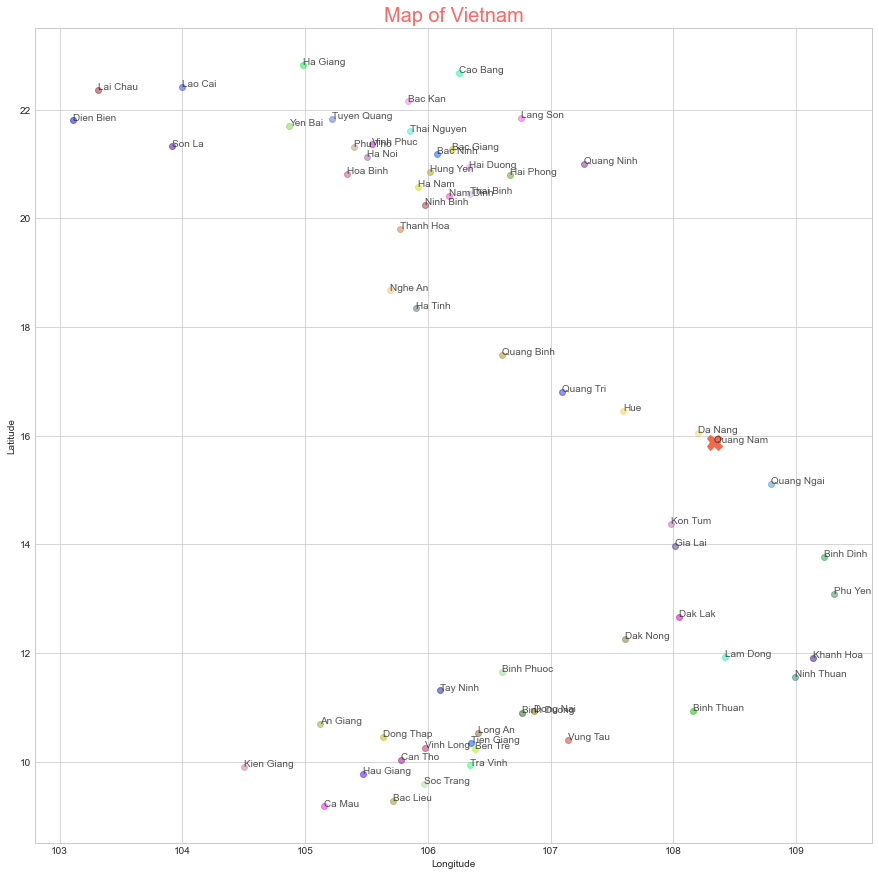

In [16]:
# Run to plot 
save_path()